# Predict German Election

In [6]:
#import libraries

import pyreadr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [7]:
#load data

polls = pd.read_csv("polls_btw.csv", index_col='date', parse_dates=True)
polls.head()

election  sample_size   institute party  support election_date  \
date                                                                         
1951-04-15    1953.0          NaN  allensbach   oth     24.0    1953-09-06   
1950-11-15    1953.0          NaN  allensbach   gru      NaN    1953-09-06   
1952-12-15    1953.0          NaN  allensbach   spd     35.0    1953-09-06   
1953-02-15    1953.0          NaN  allensbach   spd     33.0    1953-09-06   
1951-03-15    1953.0          NaN  allensbach   gru      NaN    1953-09-06   

            days_to_election  
date                          
1951-04-15             875.0  
1950-11-15            1026.0  
1952-12-15             265.0  
1953-02-15             203.0  
1951-03-15             906.0

## Exploratory Data Analysis

In [8]:
#Impute sample_size with 1000 for missing values

polls["sample_size"].fillna(1000, inplace=True)
polls.head()

election  sample_size   institute party  support election_date  \
date                                                                         
1951-04-15    1953.0       1000.0  allensbach   oth     24.0    1953-09-06   
1950-11-15    1953.0       1000.0  allensbach   gru      NaN    1953-09-06   
1952-12-15    1953.0       1000.0  allensbach   spd     35.0    1953-09-06   
1953-02-15    1953.0       1000.0  allensbach   spd     33.0    1953-09-06   
1951-03-15    1953.0       1000.0  allensbach   gru      NaN    1953-09-06   

            days_to_election  
date                          
1951-04-15             875.0  
1950-11-15            1026.0  
1952-12-15             265.0  
1953-02-15             203.0  
1951-03-15             906.0

In [9]:
#see how many unique polling institutions there are

polls['institute'].unique()

array(['allensbach', 'fgruppe_wahlen', 'forsa', 'emnid',
       'infratest_dimap', 'gms', 'insa'], dtype=object)

In [10]:
#see how many unique parties there are in the polls

polls['party'].unique()

array(['oth', 'gru', 'spd', 'cdu', 'lin', 'fdp', 'afd'], dtype=object)

In [11]:
#create data frame with polls from each institutions in 2017 

election2017_allen = polls.loc[(polls['institute'] == 'allensbach') & (polls['election'] == 2017)]
election2017_insa = polls.loc[(polls['institute'] == 'insa') & (polls['election'] == 2017)]
election2017_forsa = polls.loc[(polls['institute'] == 'forsa') & (polls['election'] == 2017)]
election2017_emnid = polls.loc[(polls['institute'] == 'emnid') & (polls['election'] == 2017)]
election2017_gms = polls.loc[(polls['institute'] == 'gms') & (polls['election'] == 2017)]
election2017_infra = polls.loc[(polls['institute'] == 'infratest_dimap') & (polls['election'] == 2017)]
election2017_fgruppe = polls.loc[(polls['institute'] == 'fgruppe_wahlen') & (polls['election'] == 2017)]

In [12]:
#check out institution allensbach: 

election2017_allen.head()

election  sample_size   institute party  support election_date  \
date                                                                         
2015-06-18    2017.0       1400.0  allensbach   spd     26.0    2017-09-24   
2016-08-24    2017.0       1496.0  allensbach   spd     23.0    2017-09-24   
2015-08-19    2017.0       1400.0  allensbach   spd     26.0    2017-09-24   
2015-02-19    2017.0       1400.0  allensbach   spd     25.5    2017-09-24   
2017-07-18    2017.0       1403.0  allensbach   spd     25.0    2017-09-24   

            days_to_election  
date                          
2015-06-18             829.0  
2016-08-24             396.0  
2015-08-19             767.0  
2015-02-19             948.0  
2017-07-18              68.0

In [13]:
type(election2017_allen)

pandas.core.frame.DataFrame

In [14]:
#create allensbach's polls for AFD in 2017 election:

election2017_allen_afd = election2017_allen.loc[election2017_allen['party'] == 'afd']
#plot_allen_afd = sns.lineplot(x="days_to_election", y="support", data=election2017allen_afd)

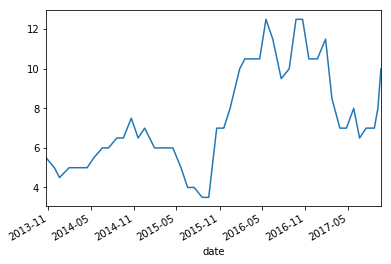

In [15]:
#plot allensbach's polls for AFD in 2017 election:
#election2017allen_afd['date'] = election2017allen_afd.index
#melted_df = pd.melt(election2017allen_afd, id_vars='date', value_name='support')
#plot_allen_afd = sns.tsplot(melted_df, time='date', value='support')
election2017_allen_afd.support['2013-10-23':'2017-09-19'].plot()
plt.show()
plt.clf()

In [16]:
upsampled_election2017_allen_afd = election2017_allen_afd['support'].resample('D').first()

In [17]:
print(upsampled_election2017_allen_afd.head(32))

date
2013-10-23    5.5
2013-10-24    NaN
2013-10-25    NaN
2013-10-26    NaN
2013-10-27    NaN
2013-10-28    NaN
2013-10-29    NaN
2013-10-30    NaN
2013-10-31    NaN
2013-11-01    NaN
2013-11-02    NaN
2013-11-03    NaN
2013-11-04    NaN
2013-11-05    NaN
2013-11-06    NaN
2013-11-07    NaN
2013-11-08    NaN
2013-11-09    NaN
2013-11-10    NaN
2013-11-11    NaN
2013-11-12    NaN
2013-11-13    NaN
2013-11-14    NaN
2013-11-15    NaN
2013-11-16    NaN
2013-11-17    NaN
2013-11-18    NaN
2013-11-19    NaN
2013-11-20    NaN
2013-11-21    NaN
2013-11-22    NaN
2013-11-23    NaN
Freq: D, Name: support, dtype: float64


In [18]:
interpolated_election2017_allen_afd = upsampled_election2017_allen_afd.interpolate(how='linear')
interpolated_election2017_allen_afd.head()

date
2013-10-23    5.500000
2013-10-24    5.485714
2013-10-25    5.471429
2013-10-26    5.457143
2013-10-27    5.442857
Freq: D, Name: support, dtype: float64

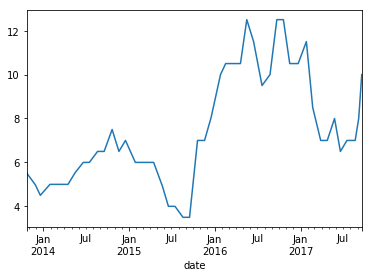

In [19]:
interpolated_election2017_allen_afd.plot()
plt.show()
plt.clf()

## Data transformation of time-series 



#### AFD

In [20]:
#Create dataframe for AFD voteshares polls by each of the 7 institutions

election2017_allen_afd = election2017_allen.loc[election2017_allen['party'] == 'afd']
election2017_insa_afd = election2017_insa.loc[election2017_insa['party'] == 'afd']
election2017_forsa_afd = election2017_forsa.loc[election2017_forsa['party'] == 'afd']
election2017_emnid_afd = election2017_emnid.loc[election2017_emnid['party'] == 'afd']
election2017_gms_afd = election2017_gms.loc[election2017_gms['party'] == 'afd']
election2017_infra_afd = election2017_infra.loc[election2017_infra['party'] == 'afd']
election2017_fgruppe_afd = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'afd']

#Create upsampled and interpolated data for Allen in AFD voteshares

t_index_final = pd.date_range(start='2013-10-23', end='2017-09-21', freq='D')
t_index_allen = pd.date_range(start='2013-10-10', end='2017-09-21', freq='D')

upsampled_election2017_allen_afd = election2017_allen_afd['support'].resample('D').first().reindex(t_index_allen)
interpolated_election2017_allen_afd = upsampled_election2017_allen_afd.interpolate(how='linear')
interpolated_election2017_allen_afd = interpolated_election2017_allen_afd.reindex(t_index_final)

#Create upsampled and interpolated data for Insa in AFD voteshares

t_index_insa = pd.date_range(start='2013-10-10', end='2017-09-21', freq='D')

upsampled_election2017_insa_afd = election2017_insa_afd['support'].resample('D').first().reindex(t_index_insa)
interpolated_election2017_insa_afd = upsampled_election2017_insa_afd.interpolate(how='linear')
interpolated_election2017_insa_afd = interpolated_election2017_insa_afd.reindex(t_index_final)

#Create upsampled and interpolated data for Forsa in AFD voteshares

t_index_forsa = pd.date_range(start='2013-10-01', end='2017-09-21', freq='D')

upsampled_election2017_forsa_afd = election2017_forsa_afd['support'].resample('D').first().reindex(t_index_forsa)
interpolated_election2017_forsa_afd = upsampled_election2017_forsa_afd.interpolate(how='linear')
interpolated_election2017_forsa_afd = interpolated_election2017_forsa_afd.reindex(t_index_final)
interpolated_election2017_forsa_afd.tail()

#Create upsampled and interpolated data for Emnid in AFD voteshares

t_index_emnid = pd.date_range(start='2013-09-29', end='2017-09-21', freq='D')

upsampled_election2017_emnid_afd = election2017_emnid_afd['support'].resample('D').first().reindex(t_index_emnid)
interpolated_election2017_emnid_afd = upsampled_election2017_emnid_afd.interpolate(how='linear')
interpolated_election2017_emnid_afd = interpolated_election2017_emnid_afd.reindex(t_index_final)
interpolated_election2017_emnid_afd.tail()

#Create upsampled and interpolated data for GMS in AFD voteshares

t_index_gms = pd.date_range(start='2013-10-15', end='2017-09-21', freq='D')

upsampled_election2017_gms_afd = election2017_gms_afd['support'].resample('D').first().reindex(t_index_gms)
interpolated_election2017_gms_afd = upsampled_election2017_gms_afd.interpolate(how='linear')
interpolated_election2017_gms_afd = interpolated_election2017_gms_afd.reindex(t_index_final)
interpolated_election2017_gms_afd.tail()

#Create upsampled and interpolated data for Infra in AFD voteshares

t_index_infra = pd.date_range(start='2013-10-10', end='2017-09-21', freq='D')

upsampled_election2017_infra_afd = election2017_infra_afd['support'].resample('D').first().reindex(t_index_infra)
interpolated_election2017_infra_afd = upsampled_election2017_infra_afd.interpolate(how='linear')
interpolated_election2017_infra_afd = interpolated_election2017_infra_afd.reindex(t_index_final)
interpolated_election2017_gms_afd.tail()

#Create upsampled and interpolated data for Fgruppe in AFD voteshares

t_index_fgruppe = pd.date_range(start='2013-09-27', end='2017-09-21', freq='D')

upsampled_election2017_fgruppe_afd = election2017_fgruppe_afd['support'].resample('D').first().reindex(t_index_fgruppe)
interpolated_election2017_fgruppe_afd = upsampled_election2017_fgruppe_afd.interpolate(how='linear')
interpolated_election2017_fgruppe_afd = interpolated_election2017_fgruppe_afd.reindex(t_index_final)
interpolated_election2017_fgruppe_afd.tail()

# Plot out party support shares for AFD through polls of all institutions

interpolated_election2017_allen_afd.plot(label="Allensbach", legend = True)
interpolated_election2017_insa_afd.plot(label="Insa", legend = True)
interpolated_election2017_forsa_afd.plot(label="Forsa", legend = True)
interpolated_election2017_emnid_afd.plot(label="Emnid", legend = True)
interpolated_election2017_gms_afd.plot(label="GMS", legend = True)
interpolated_election2017_infra_afd.plot(label="Infra", legend = True)
interpolated_election2017_fgruppe_afd.plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("AFD party support from polls for 2017 election")
plt.show()
plt.clf()

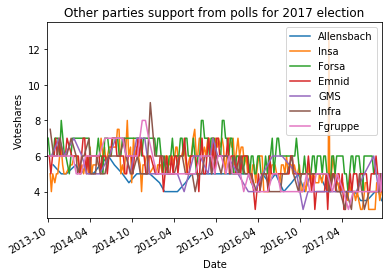

In [29]:
# Plot party support for Other parties with different polling stations 

election2017_allen_oth = election2017_allen.loc[election2017_allen['party'] == 'oth']
election2017_insa_oth = election2017_insa.loc[election2017_insa['party'] == 'oth']
election2017_forsa_oth = election2017_forsa.loc[election2017_forsa['party'] == 'oth']
election2017_emnid_oth = election2017_emnid.loc[election2017_emnid['party'] == 'oth']
election2017_gms_oth = election2017_gms.loc[election2017_gms['party'] == 'oth']
election2017_infra_oth = election2017_infra.loc[election2017_infra['party'] == 'oth']
election2017_fgruppe_oth = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'oth']

election2017_allen_oth['support'].plot(label="Allensbach", legend = True)
election2017_insa_oth['support'].plot(label="Insa", legend = True)
election2017_forsa_oth['support'].plot(label="Forsa", legend = True)
election2017_emnid_oth['support'].plot(label="Emnid", legend = True)
election2017_gms_oth['support'].plot(label="GMS", legend = True)
election2017_infra_oth['support'].plot(label="Infra", legend = True)
election2017_fgruppe_oth['support'].plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("Other parties support from polls for 2017 election")
plt.show()
plt.clf()

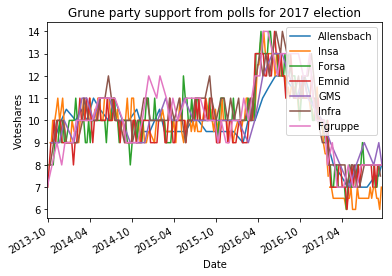

In [30]:
election2017_allen_gru = election2017_allen.loc[election2017_allen['party'] == 'gru']
election2017_insa_gru = election2017_insa.loc[election2017_insa['party'] == 'gru']
election2017_forsa_gru = election2017_forsa.loc[election2017_forsa['party'] == 'gru']
election2017_emnid_gru = election2017_emnid.loc[election2017_emnid['party'] == 'gru']
election2017_gms_gru = election2017_gms.loc[election2017_gms['party'] == 'gru']
election2017_infra_gru = election2017_infra.loc[election2017_infra['party'] == 'gru']
election2017_fgruppe_gru = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'gru']

election2017_allen_gru['support'].plot(label="Allensbach", legend = True)
election2017_insa_gru['support'].plot(label="Insa", legend = True)
election2017_forsa_gru['support'].plot(label="Forsa", legend = True)
election2017_emnid_gru['support'].plot(label="Emnid", legend = True)
election2017_gms_gru['support'].plot(label="GMS", legend = True)
election2017_infra_gru['support'].plot(label="Infra", legend = True)
election2017_fgruppe_gru['support'].plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("Grune party support from polls for 2017 election")
plt.show()
plt.clf()

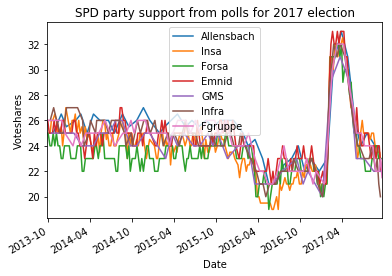

In [31]:
election2017_allen_spd = election2017_allen.loc[election2017_allen['party'] == 'spd']
election2017_insa_spd = election2017_insa.loc[election2017_insa['party'] == 'spd']
election2017_forsa_spd = election2017_forsa.loc[election2017_forsa['party'] == 'spd']
election2017_emnid_spd = election2017_emnid.loc[election2017_emnid['party'] == 'spd']
election2017_gms_spd = election2017_gms.loc[election2017_gms['party'] == 'spd']
election2017_infra_spd = election2017_infra.loc[election2017_infra['party'] == 'spd']
election2017_fgruppe_spd = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'spd']

election2017_allen_spd['support'].plot(label="Allensbach", legend = True)
election2017_insa_spd['support'].plot(label="Insa", legend = True)
election2017_forsa_spd['support'].plot(label="Forsa", legend = True)
election2017_emnid_spd['support'].plot(label="Emnid", legend = True)
election2017_gms_spd['support'].plot(label="GMS", legend = True)
election2017_infra_spd['support'].plot(label="Infra", legend = True)
election2017_fgruppe_spd['support'].plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("SPD party support from polls for 2017 election")
plt.show()
plt.clf()

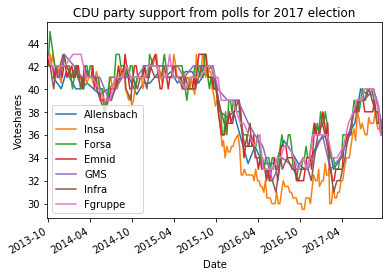

In [32]:
election2017_allen_cdu = election2017_allen.loc[election2017_allen['party'] == 'cdu']
election2017_insa_cdu = election2017_insa.loc[election2017_insa['party'] == 'cdu']
election2017_forsa_cdu = election2017_forsa.loc[election2017_forsa['party'] == 'cdu']
election2017_emnid_cdu = election2017_emnid.loc[election2017_emnid['party'] == 'cdu']
election2017_gms_cdu = election2017_gms.loc[election2017_gms['party'] == 'cdu']
election2017_infra_cdu = election2017_infra.loc[election2017_infra['party'] == 'cdu']
election2017_fgruppe_cdu = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'cdu']

election2017_allen_cdu['support'].plot(label="Allensbach", legend = True)
election2017_insa_cdu['support'].plot(label="Insa", legend = True)
election2017_forsa_cdu['support'].plot(label="Forsa", legend = True)
election2017_emnid_cdu['support'].plot(label="Emnid", legend = True)
election2017_gms_cdu['support'].plot(label="GMS", legend = True)
election2017_infra_cdu['support'].plot(label="Infra", legend = True)
election2017_fgruppe_cdu['support'].plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("CDU party support from polls for 2017 election")
plt.show()
plt.clf()

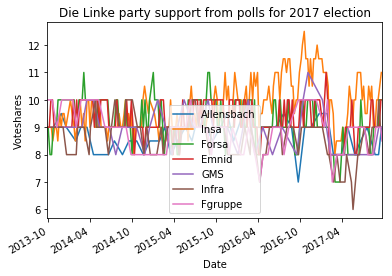

In [33]:
election2017_allen_lin = election2017_allen.loc[election2017_allen['party'] == 'lin']
election2017_insa_lin = election2017_insa.loc[election2017_insa['party'] == 'lin']
election2017_forsa_lin = election2017_forsa.loc[election2017_forsa['party'] == 'lin']
election2017_emnid_lin = election2017_emnid.loc[election2017_emnid['party'] == 'lin']
election2017_gms_lin = election2017_gms.loc[election2017_gms['party'] == 'lin']
election2017_infra_lin = election2017_infra.loc[election2017_infra['party'] == 'lin']
election2017_fgruppe_lin = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'lin']

election2017_allen_lin['support'].plot(label="Allensbach", legend = True)
election2017_insa_lin['support'].plot(label="Insa", legend = True)
election2017_forsa_lin['support'].plot(label="Forsa", legend = True)
election2017_emnid_lin['support'].plot(label="Emnid", legend = True)
election2017_gms_lin['support'].plot(label="GMS", legend = True)
election2017_infra_lin['support'].plot(label="Infra", legend = True)
election2017_fgruppe_lin['support'].plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("Die Linke party support from polls for 2017 election")
plt.show()
plt.clf()

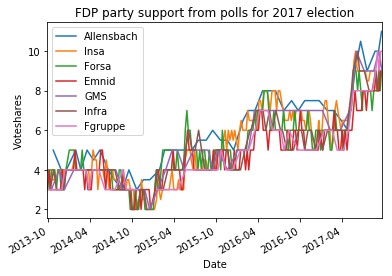

In [34]:
election2017_allen_fdp = election2017_allen.loc[election2017_allen['party'] == 'fdp']
election2017_insa_fdp = election2017_insa.loc[election2017_insa['party'] == 'fdp']
election2017_forsa_fdp = election2017_forsa.loc[election2017_forsa['party'] == 'fdp']
election2017_emnid_fdp = election2017_emnid.loc[election2017_emnid['party'] == 'fdp']
election2017_gms_fdp = election2017_gms.loc[election2017_gms['party'] == 'fdp']
election2017_infra_fdp = election2017_infra.loc[election2017_infra['party'] == 'fdp']
election2017_fgruppe_fdp = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'fdp']

election2017_allen_fdp['support'].plot(label="Allensbach", legend = True)
election2017_insa_fdp['support'].plot(label="Insa", legend = True)
election2017_forsa_fdp['support'].plot(label="Forsa", legend = True)
election2017_emnid_fdp['support'].plot(label="Emnid", legend = True)
election2017_gms_fdp['support'].plot(label="GMS", legend = True)
election2017_infra_fdp['support'].plot(label="Infra", legend = True)
election2017_fgruppe_fdp['support'].plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("FDP party support from polls for 2017 election")
plt.show()
plt.clf()

In [35]:
#Create new dataframe with all new time-series from 7 institutions

frames_afd = [interpolated_election2017_allen_afd, interpolated_election2017_insa_afd, 
         interpolated_election2017_forsa_afd, interpolated_election2017_emnid_afd,
         interpolated_election2017_gms_afd, interpolated_election2017_infra_afd, 
         interpolated_election2017_fgruppe_afd]

result_afd = pd.concat(frames_afd, axis=1)
final_result_afd = result_afd.T
final_result_afd.head()

2013-10-23  2013-10-24  2013-10-25  2013-10-26  2013-10-27  \
support    5.500000    5.485714    5.471429    5.457143    5.442857   
support    4.111111    4.166667    4.222222    4.277778    4.333333   
support    5.000000    5.000000    5.000000    5.000000    5.000000   
support    5.000000    5.000000    5.000000    5.000000    5.000000   
support    5.771429    5.742857    5.714286    5.685714    5.657143   

         2013-10-28  2013-10-29  2013-10-30  2013-10-31  2013-11-01  ...  \
support    5.428571    5.414286    5.400000    5.385714    5.371429  ...   
support    4.388889    4.444444    4.500000    4.428571    4.357143  ...   
support    5.000000    5.000000    5.000000    5.000000    5.000000  ...   
support    5.000000    5.000000    5.000000    5.000000    5.000000  ...   
support    5.628571    5.600000    5.571429    5.542857    5.514286  ...   

         2017-09-12  2017-09-13  2017-09-14  2017-09-15  2017-09-16  \
support    8.923077    9.076923    9.230769    9.384615    9.538462   
support   11.000000   11.000000   11.000000   11.000000   11.000000   
support    9.000000    9.000000    9.000000    9.000000    9.000000   
support    9.857143   10.142857   10.428571   10.714286   11.000000   
support    8.714286    8.857143    9.000000    9.142857    9.285714   

         2017-09-17  2017-09-18  2017-09-19  2017-09-20  2017-09-21  
support    9.692308    9.846154   10.000000   10.000000        10.0  
support   11.000000   11.000000   11.000000   11.000000        11.0  
support    9.000000    9.000000    9.000000    9.000000         9.0  
support   11.000000   11.000000   11.000000   11.000000        11.0  
support    9.428571    9.571429    9.714286    9.857143        10.0  

[5 rows x 1430 columns]

## MODELLING FOR AFD

In [36]:
#import libraries 

import talib
import numpy as np
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor


##### Correlations
Correlations are nice to check out before building machine learning models, because we can see which features correlate to the target most strongly. Pearson's correlation coefficient is often used, which only detects linear relationships. It's commonly assumed our data is normally distributed, which we can "eyeball" from histograms. Highly correlated variables have a Pearson correlation coefficient near 1 (positively correlated) or -1 (negatively correlated). A value near 0 means the two variables are not linearly correlated.

If we use the same time periods for previous voteshares changes and future voteshares changes, we can see if the vote share is mean-reverting (bounces around) or trend-following (goes up if it has been going up recently).

In [37]:
#Create dataframe from interpolated allensbach data for AFD

df_2017_allen_afd = interpolated_election2017_allen_afd.to_frame()
df_2017_allen_afd.tail()

support
2017-09-17   9.692308
2017-09-18   9.846154
2017-09-19  10.000000
2017-09-20  10.000000
2017-09-21  10.000000

In [38]:
# Create 3-day % changes of support for the current day, and 3 days in the future

df_2017_allen_afd['3d_future'] = df_2017_allen_afd['support'].shift(-3)
df_2017_allen_afd['3d_future_pct'] = df_2017_allen_afd['3d_future'].pct_change(3)
df_2017_allen_afd['3d_pct'] = df_2017_allen_afd['support'].pct_change(3)

In [39]:
#look at the new dataframe

df_2017_allen_afd.head(10)

support  3d_future  3d_future_pct    3d_pct
2013-10-23  5.500000   5.457143            NaN       NaN
2013-10-24  5.485714   5.442857            NaN       NaN
2013-10-25  5.471429   5.428571            NaN       NaN
2013-10-26  5.457143   5.414286      -0.007853 -0.007792
2013-10-27  5.442857   5.400000      -0.007874 -0.007812
2013-10-28  5.428571   5.385714      -0.007895 -0.007833
2013-10-29  5.414286   5.371429      -0.007916 -0.007853
2013-10-30  5.400000   5.357143      -0.007937 -0.007874
2013-10-31  5.385714   5.342857      -0.007958 -0.007895
2013-11-01  5.371429   5.328571      -0.007979 -0.007916

In [40]:
# Calculate the correlation matrix between the 3d close pecentage changes (current and future)

corr = df_2017_allen_afd[['3d_pct', '3d_future_pct']].corr()
print(corr)

                 3d_pct  3d_future_pct
3d_pct         1.000000       0.923151
3d_future_pct  0.923151       1.000000


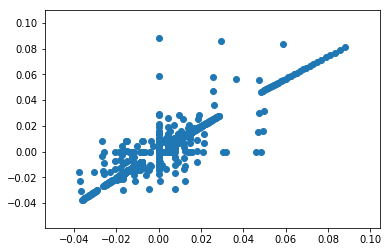

In [41]:
# Scatter the current 3-day percent change vs the future 3-day percent change
plt.scatter(df_2017_allen_afd['3d_pct'], df_2017_allen_afd['3d_future_pct'])
plt.show()

#### Create moving average

We want to add historical data to our machine learning models to make better predictions, but adding lots of historical time steps is tricky. Instead, we can condense information from previous points into a single timestep with indicators.

A moving average is one of the simplest indicators - it's the average of previous data points. This is the function talib.SMA() from the TAlib library.

In [42]:
feature_names = ['3d_future_pct']  # a list of the feature names for later

# Create moving averages timeperiods of 3, 5, 10, 20, 30, 50, 100 and 200
for n in [3, 5, 10, 20, 30, 50, 100, 200]:

    # Create the moving average indicator and divide by support
    df_2017_allen_afd['ma' + str(n)] = talib.SMA(df_2017_allen_afd['support'].values,
                              timeperiod=n) / df_2017_allen_afd['support']
    # Create the RSI indicator
    #df_2017_allen_afd['rsi' + str(n)] = talib.RSI(df_2017_allen_afd['support'].values, timeperiod=n)
    
    # Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n)]
print(feature_names)

['3d_future_pct', 'ma3', 'ma5', 'ma10', 'ma20', 'ma30', 'ma50', 'ma100', 'ma200']


In [43]:
df_2017_allen_afd.head(20)

support  3d_future  3d_future_pct    3d_pct       ma3       ma5  \
2013-10-23  5.500000   5.457143            NaN       NaN       NaN       NaN   
2013-10-24  5.485714   5.442857            NaN       NaN       NaN       NaN   
2013-10-25  5.471429   5.428571            NaN       NaN  1.002611       NaN   
2013-10-26  5.457143   5.414286      -0.007853 -0.007792  1.002618       NaN   
2013-10-27  5.442857   5.400000      -0.007874 -0.007812  1.002625  1.005249   
2013-10-28  5.428571   5.385714      -0.007895 -0.007833  1.002632  1.005263   
2013-10-29  5.414286   5.371429      -0.007916 -0.007853  1.002639  1.005277   
2013-10-30  5.400000   5.357143      -0.007937 -0.007874  1.002646  1.005291   
2013-10-31  5.385714   5.342857      -0.007958 -0.007895  1.002653  1.005305   
2013-11-01  5.371429   5.328571      -0.007979 -0.007916  1.002660  1.005319   
2013-11-02  5.357143   5.314286      -0.008000 -0.007937  1.002667  1.005333   
2013-11-03  5.342857   5.300000      -0.008021 -0.007958  1.002674  1.005348   
2013-11-04  5.328571   5.285714      -0.008043 -0.007979  1.002681  1.005362   
2013-11-05  5.314286   5.271429      -0.008065 -0.008000  1.002688  1.005376   
2013-11-06  5.300000   5.257143      -0.008086 -0.008021  1.002695  1.005391   
2013-11-07  5.285714   5.242857      -0.008108 -0.008043  1.002703  1.005405   
2013-11-08  5.271429   5.228571      -0.008130 -0.008065  1.002710  1.005420   
2013-11-09  5.257143   5.214286      -0.008152 -0.008086  1.002717  1.005435   
2013-11-10  5.242857   5.200000      -0.008174 -0.008108  1.002725  1.005450   
2013-11-11  5.228571   5.185714      -0.008197 -0.008130  1.002732  1.005464   

                ma10      ma20  ma30  ma50  ma100  ma200  
2013-10-23       NaN       NaN   NaN   NaN    NaN    NaN  
2013-10-24       NaN       NaN   NaN   NaN    NaN    NaN  
2013-10-25       NaN       NaN   NaN   NaN    NaN    NaN  
2013-10-26       NaN       NaN   NaN   NaN    NaN    NaN  
2013-10-27       NaN       NaN   NaN   NaN    NaN    NaN  
2013-10-28       NaN       NaN   NaN   NaN    NaN    NaN  
2013-10-29       NaN       NaN   NaN   NaN    NaN    NaN  
2013-10-30       NaN       NaN   NaN   NaN    NaN    NaN  
2013-10-31       NaN       NaN   NaN   NaN    NaN    NaN  
2013-11-01  1.011968       NaN   NaN   NaN    NaN    NaN  
2013-11-02  1.012000       NaN   NaN   NaN    NaN    NaN  
2013-11-03  1.012032       NaN   NaN   NaN    NaN    NaN  
2013-11-04  1.012064       NaN   NaN   NaN    NaN    NaN  
2013-11-05  1.012097       NaN   NaN   NaN    NaN    NaN  
2013-11-06  1.012129       NaN   NaN   NaN    NaN    NaN  
2013-11-07  1.012162       NaN   NaN   NaN    NaN    NaN  
2013-11-08  1.012195       NaN   NaN   NaN    NaN    NaN  
2013-11-09  1.012228       NaN   NaN   NaN    NaN    NaN  
2013-11-10  1.012262       NaN   NaN   NaN    NaN    NaN  
2013-11-11  1.012295  1.025956   NaN   NaN    NaN    NaN

In [44]:
df_2017_allen_afd = df_2017_allen_afd.dropna()

# Create features and targets
# use feature_names for features; '5d_close_future_pct' for targets
features = df_2017_allen_afd[feature_names]
targets = df_2017_allen_afd['3d_future']

# Create DataFrame from target column and feature columns
feature_and_target_cols = ['3d_future'] + feature_names
feat_targ_df = df_2017_allen_afd[feature_and_target_cols]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

               3d_future  3d_future_pct       ma3       ma5      ma10  \
3d_future       1.000000       0.010718 -0.046979 -0.056604 -0.079524   
3d_future_pct   0.010718       1.000000 -0.942369 -0.930175 -0.896611   
ma3            -0.046979      -0.942369  1.000000  0.994403  0.967001   
ma5            -0.056604      -0.930175  0.994403  1.000000  0.984826   
ma10           -0.079524      -0.896611  0.967001  0.984826  1.000000   
ma20           -0.121077      -0.827028  0.902962  0.927801  0.970825   
ma30           -0.157662      -0.752974  0.833167  0.860684  0.915457   
ma50           -0.218267      -0.624141  0.701935  0.729511  0.790111   
ma100          -0.326635      -0.449299  0.513022  0.535717  0.587977   
ma200          -0.482655      -0.313555  0.369658  0.388982  0.434164   

                   ma20      ma30      ma50     ma100     ma200  
3d_future     -0.121077 -0.157662 -0.218267 -0.326635 -0.482655  
3d_future_pct -0.827028 -0.752974 -0.624141 -0.449299 -0.313555 

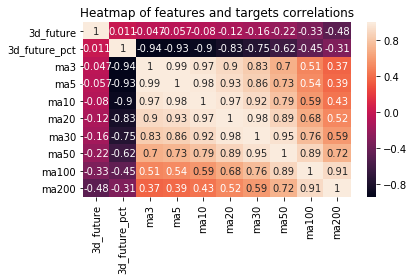

In [49]:
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.title("Heatmap of features and targets correlations")
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()  # clear the plot area

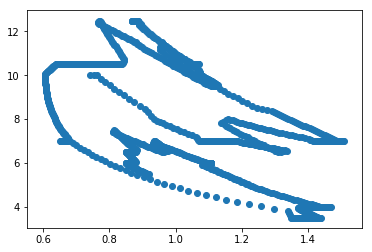

In [50]:
# Create a scatter plot of the most highly correlated variable with the target
plt.scatter(df_2017_allen_afd['ma200'], df_2017_allen_afd['3d_future'])
plt.show()

#### Linear Model 

##### Create training and test features

In [51]:

# Import the statsmodels.api library with the alias sm
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.85 * features.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:]
test_targets = targets[train_size:]
print(linear_features.shape, train_features.shape, test_features.shape)

(1228, 10) (1043, 10) (185, 10)


/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [52]:
# Create the linear model and complete the least squares fit
model_allen_afd = sm.OLS(train_targets, train_features)
results_allen_afd = model_allen_afd.fit()  # fit the model
print(results_allen_afd.summary())

                            OLS Regression Results                            
Dep. Variable:              3d_future   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     65.71
Date:                Mon, 21 Oct 2019   Prob (F-statistic):           2.32e-95
Time:                        11:07:57   Log-Likelihood:                -2246.0
No. Observations:                1043   AIC:                             4512.
Df Residuals:                    1033   BIC:                             4561.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            27.5580     78.431      0.351

In [53]:
# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results_allen_afd.pvalues)


const            7.253838e-01
3d_future_pct    1.045518e-01
ma3              9.352551e-01
ma5              9.266700e-01
ma10             6.987048e-01
ma20             4.139108e-01
ma30             2.744931e-01
ma50             3.251931e-02
ma100            3.659072e-17
ma200            6.243565e-65
dtype: float64


In [54]:
# Make predictions from our model for train and test sets
train_predictions = results_allen_afd.predict(train_features)
test_predictions = results_allen_afd.predict(test_features)
print(test_predictions)

2017-03-18    5.646715
2017-03-19    5.643265
2017-03-20    5.644531
2017-03-21    5.650597
2017-03-22    5.661552
2017-03-23    5.677484
2017-03-24    5.698486
2017-03-25    5.717059
2017-03-26    5.608430
2017-03-27    5.495718
2017-03-28    5.378845
2017-03-29    5.487494
2017-03-30    5.556316
2017-03-31    5.585313
2017-04-01    5.604037
2017-04-02    5.611661
2017-04-03    5.624260
2017-04-04    5.641834
2017-04-05    5.664383
2017-04-06    5.691908
2017-04-07    5.724407
2017-04-08    5.748590
2017-04-09    5.764457
2017-04-10    5.772006
2017-04-11    5.770268
2017-04-12    5.759241
2017-04-13    5.738927
2017-04-14    5.712254
2017-04-15    5.679224
2017-04-16    5.639835
                ...   
2017-08-20    6.821327
2017-08-21    6.643096
2017-08-22    6.463459
2017-08-23    6.616669
2017-08-24    6.710643
2017-08-25    6.747024
2017-08-26    6.770420
2017-08-27    6.781182
2017-08-28    6.802633
2017-08-29    6.834485
2017-08-30    6.876463
2017-08-31    6.928299
2017-09-01 

#### Evaluate Linear Model Results

Once we have our linear fit and predictions, we want to see how good the predictions are so we can decide if our model is any good or not. 

A quick way to understand the performance of our model is looking at regression evaluation metrics like R2, and plotting the predictions versus the actual values of the targets. Perfect predictions would form a straight, diagonal line in such a plot, making it easy for us to eyeball how our predictions are doing in different regions of voteshare changes.

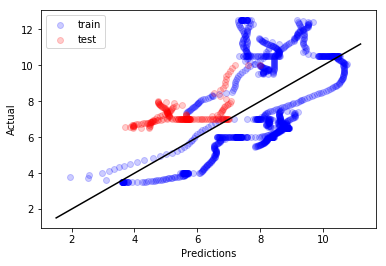

In [55]:
# Scatter the predictions vs the targets with 80% transparency
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha = 0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

# Set the axis labels and show the plot
plt.title('')
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.legend()  # show the legend
plt.show()

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

linear_model_allen_afd = LinearRegression()
linear_model_allen_afd.fit(train_features, train_targets)

# Check the score on train and test
print(linear_model_allen_afd.score(train_features, train_targets))
print(linear_model_allen_afd.score(test_features, test_targets))

#Check Root mean squared error
linear_model_allen_afd_pred = linear_model_allen_afd.predict(test_features)
print(sqrt(mean_squared_error(linear_model_allen_afd_pred, test_targets)))

0.36407560540611095
-7.226329182383553
1.9504572826298539


#### Decision Tree Model

In [57]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree_allen_afd = DecisionTreeRegressor(max_depth=3)

# Fit the model to the training features and targets
decision_tree_allen_afd.fit(train_features, train_targets)

# Check the score on train and test
print(decision_tree_allen_afd.score(train_features, train_targets))
print(decision_tree_allen_afd.score(test_features, test_targets))

#Check Root mean squared error
decision_tree_allen_afd_pred = decision_tree_allen_afd.predict(test_features)
print(sqrt(mean_squared_error(decision_tree_allen_afd_pred, test_targets)))

0.49153789399141035
-7.242002638189584
1.9523144815035618


As expected, perfect fit on the training data but quite a bad fit on the test data. Let's see if we can improve by experimenting on the max height of the trees. 

In [58]:
# Loop through a few different max depths and check the performance
for d in [3, 5, 10, 15, 20, 25]:
    # Create the tree and fit it
    decision_tree_allen_afd = DecisionTreeRegressor(max_depth=d)
    decision_tree_allen_afd.fit(train_features, train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree_allen_afd.score(train_features, train_targets))
    print(decision_tree_allen_afd.score(test_features, test_targets), '\n')

max_depth= 3
0.49153789399141035
-7.2420026381895735 

max_depth= 5
0.7435521806871099
-15.794331206929819 

max_depth= 10
0.9813466370440243
-15.299793440951788 

max_depth= 15
0.9999949868538771
-15.413563451337978 

max_depth= 20
1.0
-15.011104990269999 

max_depth= 25
1.0
-15.219585593837524 



It seems that trees of max height 3 would be the best at predicting the changes in voteshares percentage during the next 5 days. 

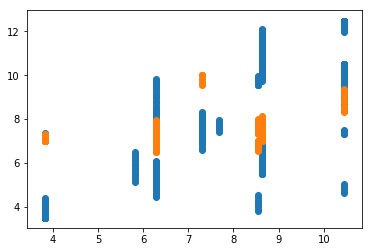

In [59]:
# Use the best max_depth of 3 from last exercise to fit a decision tree
decision_tree_allen_afd = DecisionTreeRegressor(max_depth=3)
decision_tree_allen_afd.fit(train_features, train_targets)

# Predict values for train and test
train_predictions = decision_tree_allen_afd.predict(train_features)
test_predictions = decision_tree_allen_afd.predict(test_features)

# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label = 'test')
plt.show()

#### Random Forest Model 

In [60]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr_allen_afd = RandomForestRegressor(n_estimators=50)
rfr_allen_afd.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr_allen_afd.score(train_features, train_targets))
print(rfr_allen_afd.score(test_features, test_targets))

# Check RMSE
rfr_allen_afd_pred = rfr_allen_afd.predict(test_features)
print(sqrt(mean_squared_error(rfr_allen_afd_pred, test_targets)))

0.9963103275260438
-8.91732782867268
2.1415624132461217


Let's see if we can improve on the score with hyperparameter tuning: 

In [61]:
from sklearn.model_selection import ParameterGrid

# Create a dictionary of hyperparameters to search
grid = {'n_estimators': [50,100,200,300], 'max_depth': [3], 'max_features': [4, 8], 'random_state': [42]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr_allen_afd.set_params(**g)  # ** is "unpacking" the dictionary
    rfr_allen_afd.fit(train_features, train_targets)
    test_scores.append(rfr_allen_afd.score(test_features, test_targets))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

-3.8163508183839667 {'random_state': 42, 'n_estimators': 50, 'max_features': 4, 'max_depth': 3}


0.5274883159960239
-3.8163508183839667
1.4924248013938481


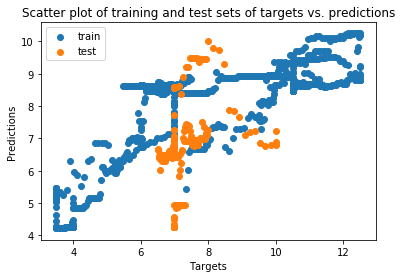

In [62]:
# Use the best hyperparameters from before to fit a random forest model
rfr_allen_afd = RandomForestRegressor(n_estimators=50, max_depth=3, max_features=4, random_state=42)
rfr_allen_afd.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = rfr_allen_afd.predict(train_features)
test_predictions = rfr_allen_afd.predict(test_features)

# Look at the R^2 scores on train and test
print(rfr_allen_afd.score(train_features, train_targets))
print(rfr_allen_afd.score(test_features, test_targets))

# Check RMSE
rfr_allen_afd_pred = rfr_allen_afd.predict(test_features)
print(sqrt(mean_squared_error(rfr_allen_afd_pred, test_targets)))

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_targets, train_predictions, label='train')
plt.scatter(test_targets, test_predictions, label='test')
plt.title('Scatter plot of training and test sets of targets vs. predictions')
plt.xlabel('Targets')
plt.ylabel('Predictions')
plt.legend()
plt.show()

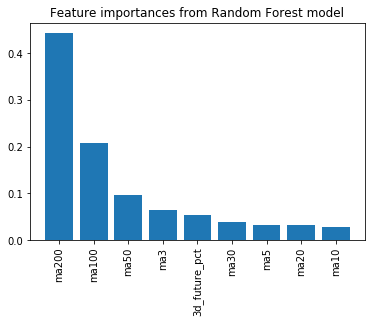

In [63]:
# Get feature importances from our random forest model
importances = rfr_allen_afd.feature_importances_
importances = importances[importances != 0]

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

# Create tick labels 
labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical
plt.xticks(rotation=90)
plt.title("Feature importances from Random Forest model")
plt.show()

In [61]:
# Gradient Boosting Model 
from sklearn.ensemble import GradientBoostingRegressor

# Create GB model
gbr_allen_afd = GradientBoostingRegressor(max_features=4,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
result_gbr = gbr_allen_afd.fit(train_features, train_targets)

print(gbr_allen_afd.score(train_features, train_targets))
print(gbr_allen_afd.score(test_features, test_targets))

# Check RMSE
gbr_allen_afd_pred = gbr_allen_afd.predict(test_features)
print(sqrt(mean_squared_error(gbr_allen_afd_pred, test_targets)))

0.6491622974727742
-2.6842097576611614
1.3052856855710697


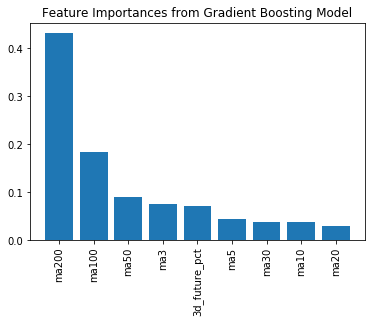

In [62]:
# Extract feature importances from the fitted gradient boosting model
feature_importances_gbr = gbr_allen_afd.feature_importances_
feature_importances_gbr = feature_importances_gbr[feature_importances_gbr != 0]

# Get the indices of the largest to smallest feature importances
sorted_index_gbr = np.argsort(feature_importances_gbr)[::-1]
x_gbr = range(features.shape[1])

# Create tick labels 
labels = np.array(feature_names)[sorted_index_gbr]

plt.bar(x_gbr, feature_importances_gbr[sorted_index_gbr], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.title('Feature Importances from Gradient Boosting Model')
plt.show()

In [65]:
# XGBoost Model
from xgboost import XGBRegressor
import xgboost as xgb

# Create the xgboost model and fit to the training data

xgb_model_allen_afd = XGBRegressor(colsample_bytree = 0.7, learning_rate= 0.01, max_depth= 7, min_child_weight= 4, n_estimators= 500, nthread= 4, objective= 'reg:linear', silent= 1, subsample= 0.7)
result_xgb = xgb_model_allen_afd.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(xgb_model_allen_afd.score(train_features, train_targets))
print(xgb_model_allen_afd.score(test_features, test_targets))

# Check RMSE
xgb_model_allen_afd_pred = xgb_model_allen_afd.predict(test_features)
print(sqrt(mean_squared_error(xgb_model_allen_afd_pred, test_targets)))

/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


0.9935721491089263
-6.338438362174
1.8421934190527058


In [66]:
from sklearn.model_selection import GridSearchCV

xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [0.01, 0.03, 0.05, 0.07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(train_features,
         train_targets)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  24 out of  24 | elapsed:   25.3s finished
/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


-11.920163700977515
{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [342]:
dtrain = xgb.DMatrix(train_features, label=train_targets)
dtest = xgb.DMatrix(test_features, label=test_targets)


/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [346]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

params['eval_metric'] = "rmse"
num_boost_round = 999
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10)

[0]	Test-rmse:5.45681
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:4.45589
[2]	Test-rmse:3.48937
[3]	Test-rmse:2.90346
[4]	Test-rmse:2.49636
[5]	Test-rmse:2.28716
[6]	Test-rmse:2.14887
[7]	Test-rmse:2.03212
[8]	Test-rmse:2.02118
[9]	Test-rmse:1.9997
[10]	Test-rmse:1.97564
[11]	Test-rmse:1.9574
[12]	Test-rmse:1.95522
[13]	Test-rmse:1.95556
[14]	Test-rmse:1.94934
[15]	Test-rmse:1.95773
[16]	Test-rmse:1.96366
[17]	Test-rmse:1.96626
[18]	Test-rmse:1.9682
[19]	Test-rmse:1.96976
[20]	Test-rmse:1.97611
[21]	Test-rmse:1.98164
[22]	Test-rmse:1.98453
[23]	Test-rmse:1.98448
[24]	Test-rmse:1.98564
Stopping. Best iteration:
[14]	Test-rmse:1.94934



In [349]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'rmse'},
    early_stopping_rounds=10)
cv_results

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0           5.630100        0.058773        5.643082       0.224679
1           4.054261        0.043310        4.080913       0.189644
2           2.963434        0.030343        3.015409       0.169399
3           2.184361        0.023999        2.266691       0.146381
4           1.631810        0.021898        1.744600       0.136442
5           1.241045        0.026979        1.385241       0.105369
6           0.962718        0.033240        1.134914       0.108229
7           0.767438        0.034188        0.977461       0.096910
8           0.634805        0.034852        0.873447       0.084350
9           0.531471        0.045482        0.790444       0.078768
10          0.442530        0.032431        0.727756       0.063425
11          0.370968        0.023481        0.672952       0.075853
12          0.331947        0.017176        0.647967       0.077875
13          0.285538        0.019878        0.616171       0.081246
14          0.256256        0.017322        0.599725       0.085820
15          0.233421        0.013648        0.585237       0.083785
16          0.204511        0.007157        0.566626       0.083200
17          0.188870        0.010573        0.559110       0.085335
18          0.174123        0.008439        0.551655       0.083560
19          0.156744        0.008180        0.542800       0.080688
20          0.144114        0.009299        0.536034       0.082137
21          0.134074        0.009818        0.530194       0.080572
22          0.123597        0.008205        0.522699       0.082318
23          0.117310        0.007781        0.521179       0.081615
24          0.108944        0.009095        0.517366       0.081990
25          0.101836        0.006863        0.514029       0.082754
26          0.097692        0.008173        0.511395       0.082283
27          0.092210        0.008531        0.508655       0.083235
28          0.088560        0.008228        0.507534       0.083363
29          0.083221        0.006829        0.506117       0.082834
..               ...             ...             ...            ...
213         0.002359        0.000219        0.483144       0.079728
214         0.002323        0.000211        0.483140       0.079732
215         0.002302        0.000201        0.483137       0.079730
216         0.002274        0.000195        0.483133       0.079733
217         0.002246        0.000187        0.483137       0.079737
218         0.002215        0.000181        0.483142       0.079736
219         0.002193        0.000179        0.483139       0.079743
220         0.002178        0.000184        0.483140       0.079742
221         0.002165        0.000186        0.483137       0.079738
222         0.002147        0.000182        0.483133       0.079735
223         0.002115        0.000183        0.483132       0.079734
224         0.002094        0.000180        0.483134       0.079736
225         0.002074        0.000172        0.483141       0.079737
226         0.002059        0.000161        0.483137       0.079735
227         0.002047        0.000156        0.483130       0.079733
228         0.002038        0.000151        0.483128       0.079732
229         0.002010        0.000134        0.483128       0.079731
230         0.001995        0.000120        0.483129       0.079732
231         0.001981        0.000099        0.483125       0.079727
232         0.001969        0.000093        0.483125       0.079727
233         0.001956        0.000083        0.483126       0.079727
234         0.001941        0.000072        0.483123       0.079722
235         0.001930        0.000065        0.483119       0.079717
236         0.001914        0.000054        0.483121       0.079721
237         0.001908        0.000047        0.483122       0.079722
238         0.001906        0.000046        0.483122       0.079722
239         0.001905        0.000045        0.483122       0.

In [350]:
cv_results['test-rmse-mean'].min()

0.48311600000000005

In [351]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [352]:
# Define initial best params and RMSE
min_rmse = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best RMSE
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with max_depth=9, min_child_weight=5


/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


	MAE 0.4737476 for 206 rounds
CV with max_depth=9, min_child_weight=6
	MAE 0.47844 for 187 rounds
CV with max_depth=9, min_child_weight=7
	MAE 0.4741632 for 291 rounds
CV with max_depth=10, min_child_weight=5
	MAE 0.46714520000000004 for 212 rounds
CV with max_depth=10, min_child_weight=6
	MAE 0.46527799999999997 for 260 rounds
CV with max_depth=10, min_child_weight=7
	MAE 0.4567472 for 194 rounds
CV with max_depth=11, min_child_weight=5
	MAE 0.46822660000000005 for 122 rounds
CV with max_depth=11, min_child_weight=6
	MAE 0.4577922 for 148 rounds
CV with max_depth=11, min_child_weight=7
	MAE 0.46371219999999996 for 175 rounds
Best params: 10, 7, RMSE: 0.4567472


In [353]:
#Best parameters for XGBoost
params['max_depth'] = 10
params['min_child_weight'] = 7

In [355]:
# Retrain the xgboost model and fit to the training data

xgb_model_allen_afd_new = XGBRegressor(max_depth = 10, min_child_weight = 7)
result_xgb_new = xgb_model_allen_afd_new.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(xgb_model_allen_afd_new.score(train_features, train_targets))
print(xgb_model_allen_afd_new.score(test_features, test_targets))

# Check RMSE
xgb_model_allen_afd_pred_new = xgb_model_allen_afd_new.predict(test_features)
print(sqrt(mean_squared_error(xgb_model_allen_afd_pred_new, test_targets)))

/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


0.9990442086663633
-12.253587432769663
2.475712017665856


In [338]:
test_predictions_xgb_model_allen_afd = xgb_model_allen_afd.predict(test_features)
print(test_predictions_xgb_model_allen_afd)

[ 4.4503403  4.393775   4.362237   4.362237   4.362237   4.362237
  4.362237   4.362237   4.1867     4.3222656  4.3222656  4.907153
  3.9317982  4.278284   3.8652427  3.8652427  4.0062013  3.8836725
  3.8990085  3.8990085  3.8990085  3.8990085  3.91862    3.91862
  3.91862    3.91862    3.91862    3.91862    3.91862    3.91862
  3.91862    3.91862    3.91862    3.91862    3.91862    3.91862
  5.00645    4.9323316  4.9323316  6.3931036  6.347856   6.3255424
  6.3255424  6.3255424  6.2243466  7.1150613  7.1150613  7.1150613
  7.6177225  7.760206   7.624819   7.624819   7.624819   7.624819
  7.624819   7.5270405  7.1693935  7.296683   7.296683   7.7289877
  7.859662   7.859662   7.859662   7.859662   8.159753   8.159753
  8.159753   6.661994   7.0350275  7.7985654  6.3978515  6.2740655
  6.7645645  6.862343   6.84473    5.7440405  5.4566255  5.4566255
  5.4566255  5.43677    5.1232557  5.1232557  4.854418   4.854418
  4.854418   4.854418   4.854418   4.854418   4.854418   4.8794146
  5.09

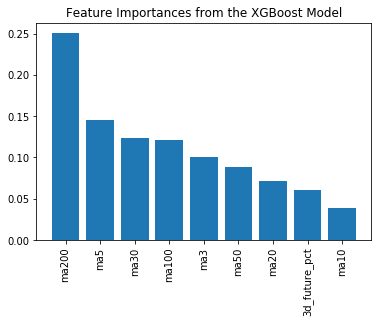

In [358]:
# Extract feature importances from the fitted gradient boosting model
feature_importances_xgb = xgb_model_allen_afd.feature_importances_
feature_importances_xgb = feature_importances_xgb[feature_importances_xgb != 0]

# Get the indices of the largest to smallest feature importances
sorted_index_xgb = np.argsort(feature_importances_xgb)[::-1]
x_xgb = range(features.shape[1])

# Create tick labels 
labels = np.array(feature_names)[sorted_index_xgb]

plt.bar(x_xgb, feature_importances_xgb[sorted_index_xgb], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.title('Feature Importances from the XGBoost Model')
plt.show()

In [255]:
# Deep Learning Model

#import libraries 
import tensorflow as tf
from tensorflow import keras

dnnmodel_allen_afd = tf.keras.Sequential()
dnnmodel_allen_afd.add(keras.layers.Dense(100, input_dim=train_features.shape[1], activation='relu'))
dnnmodel_allen_afd.add(keras.layers.Dense(20, activation='relu'))
dnnmodel_allen_afd.add(keras.layers.Dense(1, activation='linear'))

# Fit the model with our custom 'sign_penalty' loss function
dnnmodel_allen_afd.compile(optimizer='adam', loss='mean_squared_error')
history = dnnmodel_allen_afd.fit(train_features, train_targets, epochs=25)
print(dnnmodel_allen_afd.predict(test_features))

Train on 1043 samples
Epoch 1/25
1043/1043 [==============================] - 0s 178us/sample - loss: 0.0722
Epoch 2/25
1043/1043 [==============================] - 0s 64us/sample - loss: 0.0018
Epoch 3/25
1043/1043 [==============================] - 0s 105us/sample - loss: 5.7861e-04
Epoch 4/25
1043/1043 [==============================] - 0s 66us/sample - loss: 4.7978e-04
Epoch 5/25
1043/1043 [==============================] - 0s 49us/sample - loss: 4.2982e-04
Epoch 6/25
1043/1043 [==============================] - 0s 68us/sample - loss: 3.9867e-04
Epoch 7/25
1043/1043 [==============================] - 0s 177us/sample - loss: 3.8245e-04
Epoch 8/25
1043/1043 [==============================] - 0s 130us/sample - loss: 3.6612e-04
Epoch 9/25
1043/1043 [==============================] - 0s 121us/sample - loss: 3.6218e-04
Epoch 10/25
1043/1043 [==============================] - 0s 95us/sample - loss: 3.5319e-04
Epoch 11/25
1043/1043 [==============================] - 0s 76us/sample - loss: 

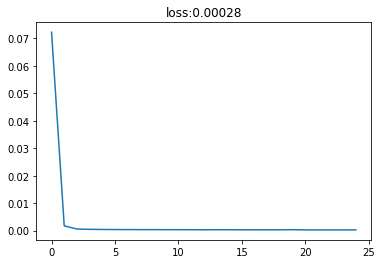

In [256]:
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

In [259]:
# Evaluate R^2 scores
from sklearn.metrics import mean_squared_error, r2_score

train_preds_dnn_allen_afd = dnnmodel_allen_afd.predict(train_features)
test_preds_dnn_allen_afd = dnnmodel_allen_afd.predict(test_features)
print(r2_score(train_targets, train_preds_dnn_allen_afd))
print(r2_score(test_targets, test_preds_dnn_allen_afd))

0.1084825883750129
-1.338070462160454


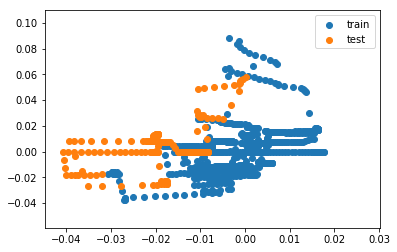

In [260]:
# Scatter the predictions vs actual
plt.scatter(train_preds_dnn_allen_afd, train_targets, label='train')
plt.scatter(test_preds_dnn_allen_afd, test_targets, label='test')  # plot test set
plt.legend(); plt.show()

In [305]:
#Create dataframe from interpolated allensbach data for AFD

df_2017_allen_afd = interpolated_election2017_allen_afd.to_frame()
df_2017_allen_afd.tail()

# Create 3-day % changes of support for the current day, and 3 days in the future

df_2017_allen_afd['3d_future'] = df_2017_allen_afd['support'].shift(-3)
df_2017_allen_afd['3d_future_pct'] = df_2017_allen_afd['3d_future'].pct_change(3)
df_2017_allen_afd['3d_pct'] = df_2017_allen_afd['support'].pct_change(3)

feature_names = ['3d_future_pct']  # a list of the feature names for later

# Create moving averages timeperiods of 3, 5, 10, 20, 30, 50, 100 and 200
for n in [3, 5, 10, 20, 30, 50, 100, 200]:

    # Create the moving average indicator and divide by Adj_Close
    df_2017_allen_afd['ma' + str(n)] = talib.SMA(df_2017_allen_afd['support'].values,
                              timeperiod=n) / df_2017_allen_afd['support']
    # Create the RSI indicator
    #df_2017_allen_afd['rsi' + str(n)] = talib.RSI(df_2017_allen_afd['support'].values, timeperiod=n)
    
    # Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n)]
print(feature_names)

df_2017_allen_afd = df_2017_allen_afd.dropna()

# Create features and targets
# use feature_names for features; '5d_close_future_pct' for targets
features = df_2017_allen_afd[feature_names]
targets = df_2017_allen_afd['3d_future']

# Create DataFrame from target column and feature columns
feature_and_target_cols = ['3d_future'] + feature_names
feat_targ_df = df_2017_allen_afd[feature_and_target_cols]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

['3d_future_pct', 'ma3', 'ma5', 'ma10', 'ma20', 'ma30', 'ma50', 'ma100', 'ma200']
               3d_future  3d_future_pct       ma3       ma5      ma10  \
3d_future       1.000000       0.010718 -0.046979 -0.056604 -0.079524   
3d_future_pct   0.010718       1.000000 -0.942369 -0.930175 -0.896611   
ma3            -0.046979      -0.942369  1.000000  0.994403  0.967001   
ma5            -0.056604      -0.930175  0.994403  1.000000  0.984826   
ma10           -0.079524      -0.896611  0.967001  0.984826  1.000000   
ma20           -0.121077      -0.827028  0.902962  0.927801  0.970825   
ma30           -0.157662      -0.752974  0.833167  0.860684  0.915457   
ma50           -0.218267      -0.624141  0.701935  0.729511  0.790111   
ma100          -0.326635      -0.449299  0.513022  0.535717  0.587977   
ma200          -0.482655      -0.313555  0.369658  0.388982  0.434164   

                   ma20      ma30      ma50     ma100     ma200  
3d_future     -0.121077 -0.157662 -0.218267 -0.3

In [306]:
from sklearn.linear_model import LinearRegression

linear_model_allen_afd = LinearRegression()
linear_model_allen_afd.fit(train_features, train_targets)

# Check the score on train and test
print(linear_model_allen_afd.score(train_features, train_targets))
print(linear_model_allen_afd.score(test_features, test_targets))

#Check Root mean squared error
linear_model_allen_afd_pred = linear_model_allen_afd.predict(test_features)
print(sqrt(mean_squared_error(linear_model_allen_afd_pred, test_targets)))

0.9000939824340732
0.8655072267397463
0.006855685508280691


#### Combined Average Model for AFD Party in 2017 Polls

In [51]:
# combine and take average of all 

df_2017_allen_afd_combined = interpolated_election2017_allen_afd.to_frame()
df_2017_insa_afd_combined = interpolated_election2017_insa_afd.to_frame()
df_2017_forsa_combined = interpolated_election2017_forsa_afd.to_frame()
df_2017_emnid_afd_combined = interpolated_election2017_emnid_afd.to_frame()
df_2017_gms_afd_combined = interpolated_election2017_gms_afd.to_frame()
df_2017_infra_afd_combined = interpolated_election2017_infra_afd.to_frame()
df_2017_fgruppe_afd_combined = interpolated_election2017_fgruppe_afd.to_frame()


In [52]:
combined_data_afd = pd.concat([df_2017_allen_afd_combined, df_2017_insa_afd_combined, df_2017_forsa_combined, df_2017_emnid_afd_combined, df_2017_gms_afd_combined, df_2017_infra_afd_combined, df_2017_fgruppe_afd_combined]).groupby(level=0).mean()
combined_data_afd.head(30)

support
2013-10-23  5.045125
2013-10-24  5.051701
2013-10-25  5.058277
2013-10-26  5.049102
2013-10-27  5.039927
2013-10-28  5.030752
2013-10-29  5.021577
2013-10-30  5.012402
2013-10-31  4.985086
2013-11-01  4.957771
2013-11-02  4.930455
2013-11-03  4.903140
2013-11-04  4.875824
2013-11-05  4.848509
2013-11-06  4.821193
2013-11-07  4.815986
2013-11-08  4.821769
2013-11-09  4.827551
2013-11-10  4.833333
2013-11-11  4.839116
2013-11-12  4.844898
2013-11-13  4.838776
2013-11-14  4.832653
2013-11-15  4.826531
2013-11-16  4.820408
2013-11-17  4.814286
2013-11-18  4.808163
2013-11-19  4.802041
2013-11-20  4.793197
2013-11-21  4.774150

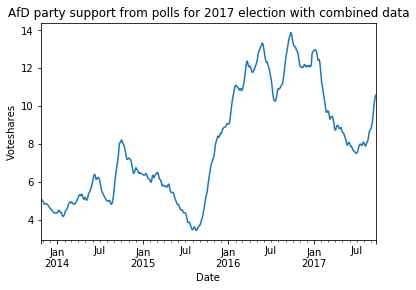

In [53]:
combined_data_afd['support'].plot()
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("AfD party support from polls for 2017 election with combined data")
plt.show()
plt.clf()

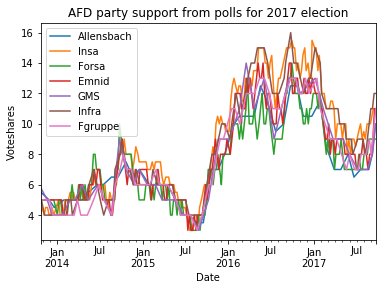

In [49]:
interpolated_election2017_allen_afd.plot(label="Allensbach", legend = True)
interpolated_election2017_insa_afd.plot(label="Insa", legend = True)
interpolated_election2017_forsa_afd.plot(label="Forsa", legend = True)
interpolated_election2017_emnid_afd.plot(label="Emnid", legend = True)
interpolated_election2017_gms_afd.plot(label="GMS", legend = True)
interpolated_election2017_infra_afd.plot(label="Infra", legend = True)
interpolated_election2017_fgruppe_afd.plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("AFD party support from polls for 2017 election")
plt.show()
plt.clf()

#### Combined Average Model for SPD Party in 2017 Polls

In [ ]:
# array(['oth', 'gru', 'spd', 'cdu', 'lin', 'fdp', 'afd'], dtype=object)


#Create dataframe for SPD voteshares polls by each of the 7 institutions

election2017_allen_spd = election2017_allen.loc[election2017_allen['party'] == 'spd']
election2017_insa_spd = election2017_insa.loc[election2017_insa['party'] == 'spd']
election2017_forsa_spd = election2017_forsa.loc[election2017_forsa['party'] == 'spd']
election2017_emnid_spd = election2017_emnid.loc[election2017_emnid['party'] == 'spd']
election2017_gms_spd = election2017_gms.loc[election2017_gms['party'] == 'spd']
election2017_infra_spd = election2017_infra.loc[election2017_infra['party'] == 'spd']
election2017_fgruppe_spd = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'spd']

#Create upsampled and interpolated data for Allen in AFD voteshares

t_index_final = pd.date_range(start='2013-10-23', end='2017-09-21', freq='D')
t_index_allen = pd.date_range(start='2013-10-10', end='2017-09-21', freq='D')

upsampled_election2017_allen_spd = election2017_allen_spd['support'].resample('D').first().reindex(t_index_allen)
interpolated_election2017_allen_spd = upsampled_election2017_allen_spd.interpolate(how='linear')
interpolated_election2017_allen_spd = interpolated_election2017_allen_spd.reindex(t_index_final)

#Create upsampled and interpolated data for Insa in AFD voteshares

t_index_insa = pd.date_range(start='2013-10-10', end='2017-09-21', freq='D')

upsampled_election2017_insa_spd = election2017_insa_spd['support'].resample('D').first().reindex(t_index_insa)
interpolated_election2017_insa_spd = upsampled_election2017_insa_spd.interpolate(how='linear')
interpolated_election2017_insa_spd = interpolated_election2017_insa_spd.reindex(t_index_final)

#Create upsampled and interpolated data for Forsa in AFD voteshares

t_index_forsa = pd.date_range(start='2013-10-01', end='2017-09-21', freq='D')

upsampled_election2017_forsa_spd = election2017_forsa_spd['support'].resample('D').first().reindex(t_index_forsa)
interpolated_election2017_forsa_spd = upsampled_election2017_forsa_spd.interpolate(how='linear')
interpolated_election2017_forsa_spd = interpolated_election2017_forsa_spd.reindex(t_index_final)

#Create upsampled and interpolated data for Emnid in AFD voteshares

t_index_emnid = pd.date_range(start='2013-09-29', end='2017-09-21', freq='D')

upsampled_election2017_emnid_spd = election2017_emnid_spd['support'].resample('D').first().reindex(t_index_emnid)
interpolated_election2017_emnid_spd = upsampled_election2017_emnid_spd.interpolate(how='linear')
interpolated_election2017_emnid_spd = interpolated_election2017_emnid_spd.reindex(t_index_final)

#Create upsampled and interpolated data for GMS in AFD voteshares

t_index_gms = pd.date_range(start='2013-10-15', end='2017-09-21', freq='D')

upsampled_election2017_gms_spd = election2017_gms_spd['support'].resample('D').first().reindex(t_index_gms)
interpolated_election2017_gms_spd = upsampled_election2017_gms_spd.interpolate(how='linear')
interpolated_election2017_gms_spd = interpolated_election2017_gms_spd.reindex(t_index_final)

#Create upsampled and interpolated data for Infra in AFD voteshares

t_index_infra = pd.date_range(start='2013-10-10', end='2017-09-21', freq='D')

upsampled_election2017_infra_spd = election2017_infra_spd['support'].resample('D').first().reindex(t_index_infra)
interpolated_election2017_infra_spd = upsampled_election2017_infra_spd.interpolate(how='linear')
interpolated_election2017_infra_spd = interpolated_election2017_infra_spd.reindex(t_index_final)

#Create upsampled and interpolated data for Fgruppe in AFD voteshares

t_index_fgruppe = pd.date_range(start='2013-09-27', end='2017-09-21', freq='D')

upsampled_election2017_fgruppe_spd = election2017_fgruppe_spd['support'].resample('D').first().reindex(t_index_fgruppe)
interpolated_election2017_fgruppe_spd = upsampled_election2017_fgruppe_spd.interpolate(how='linear')
interpolated_election2017_fgruppe_spd = interpolated_election2017_fgruppe_spd.reindex(t_index_final)

# Plot out party support shares for AFD through polls of all institutions

interpolated_election2017_allen_spd.plot(label="Allensbach", legend = True)
interpolated_election2017_insa_spd.plot(label="Insa", legend = True)
interpolated_election2017_forsa_spd.plot(label="Forsa", legend = True)
interpolated_election2017_emnid_spd.plot(label="Emnid", legend = True)
interpolated_election2017_gms_spd.plot(label="GMS", legend = True)
interpolated_election2017_infra_spd.plot(label="Infra", legend = True)
interpolated_election2017_fgruppe_spd.plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("SPD party support from polls for 2017 election")
plt.show()
plt.clf()

In [ ]:
# Combined data for SPD

df_2017_allen_spd_combined = interpolated_election2017_allen_spd.to_frame()
df_2017_insa_spd_combined = interpolated_election2017_insa_spd.to_frame()
df_2017_forsa_spd_combined = interpolated_election2017_forsa_spd.to_frame()
df_2017_emnid_spd_combined = interpolated_election2017_emnid_spd.to_frame()
df_2017_gms_spd_combined = interpolated_election2017_gms_spd.to_frame()
df_2017_infra_spd_combined = interpolated_election2017_infra_spd.to_frame()
df_2017_fgruppe_spd_combined = interpolated_election2017_fgruppe_spd.to_frame()

# Concatenate all data for SPD together
combined_data_spd = pd.concat([df_2017_allen_spd_combined, df_2017_insa_spd_combined, df_2017_forsa_spd_combined, df_2017_emnid_spd_combined, df_2017_gms_spd_combined, df_2017_infra_spd_combined, df_2017_fgruppe_spd_combined]).groupby(level=0).mean()
combined_data_spd.head(30)

In [ ]:
# Plot combined data

combined_data_spd['support'].plot()
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("SPD party support from polls for 2017 election with combined data")
plt.show()
plt.clf()